In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from potential import V
import Numerov

In [2]:
me = 1
hbar = 1

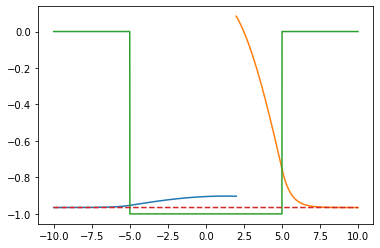

In [5]:
fig = plt.figure();
ax = fig.add_subplot(111);

N = 10000
a = 2
xmax = 10
xmin = -10

xl = np.linspace(xmin,a,N)
xr = np.linspace(a,xmax,N)
x = np.concatenate((xl,xr))
PsiR = np.zeros(N)
PsiL = np.zeros(N)
v = np.zeros(2*N)
for i in range(len(x)):
    #w = 1
    #v[i] = 1/2*me*w**2*(x[i])**2
    if abs(x[i])<5:
        v[i] = -1
    else:
        v[i]= 0
ep = -0.965
k2 = 2*me/hbar**2*(ep-v)
h2 = (abs(xmax-xmin)/(2*N))**2

def WaveFunction(k2,N,psil,psir): ### FINALLY IT WORKS!!
    psil[0]=0
    psil[1] = 1E-7
    psir[-1] = 0
    psir[-2] = 1E-7 # negative for odd parity eigenfunctions
    for i in range(2,N):
        psil[i] = (2*(1-(5.0/12)*h2*k2[i-1])*psil[i-1]-(1+(1.0/12)*h2*k2[i-2])*psil[i-2])/(1+(1.0/12)*h2*k2[i])
    for i in range(3,N+1): #The minus in indexes indicates that we start from right to the left
        psir[-i] = (2*(1-(5.0/12)*h2*k2[-i+1])*psir[-i+1]-(1+(1.0/12)*h2*k2[-i+2])*psir[-i+2])/(1+(1.0/12)*h2*k2[-i])
    return psil,psir

psi0 = WaveFunction(k2,N,PsiL,PsiR)
ax.plot(xl,psi0[0]+ep)
ax.plot(xr,psi0[1]+ep)
ax.plot(x,v)
ax.plot(x,ep*np.ones(2*N),'--')
#ax.plot(x,-0.85*np.ones(2*N),'--')
plt.show()


In [ ]:
def fEven(numerov,ep):
    numerov.ep = ep
    psi = numerov.EvenWaveFunction()
    psin = psi/np.sqrt(numerov.normalize(psi))
    return (psin[0][-1]-psin[1][0])+(numerov.LDerivate(psin[0],-1)-numerov.RDerivate(psin[1],0))

def fOdd(numerov,ep):
    numerov.ep = ep
    psi = numerov.OddWaveFunction()
    psin = psi/np.sqrt(numerov.normalize(psi))
    return (psin[0][-1]-psin[1][0])+(numerov.LDerivate(psin[0],-1)-numerov.RDerivate(psin[1],0))

def ShootingEven(numerov,eps1,eps2,deps):
    ep0 = eps1
    ep1 = eps2
    while abs(ep1-ep0)>deps:
        ep2 = ep1-(ep1-ep0)/(fEven(numerov,ep1)-fEven(numerov,ep0))*fEven(numerov,ep1)
        ep1 = ep2
        ep0 = ep1
    return ep1

def ShootingOdd(numerov,eps1,eps2,deps):
    ep0 = eps1
    ep1 = eps2
    while abs(ep1-ep0)>deps:
        ep2 = ep1-(ep1-ep0)/(fOdd(numerov,ep1)-fOdd(numerov,ep0))*fOdd(numerov,ep1)
        ep1 = ep2
        ep0 = ep1
    return ep1

def Shooting(numerov,eps,deps,delta,n):
    valid_ep = []
    eps1 = eps
    eps2 = eps1 + delta
    while len(valid_ep)<20:
        epOdd = ShootingOdd(numerov,eps1,eps2,deps)
        epEven = ShootingEven(numerov,eps1,eps2,deps)
        numerov.ep = epOdd
        psiOdd = numerov.WaveFunction()
        numerov.ep = epEven
        psiEven = numerov.WaveFunction()

        if type(psiOdd) != bool:
            valid_ep.append(epOdd)
            #print("odd")
            #print(epOdd)

        if type(psiEven) != bool :
            valid_ep.append(epEven)
            #print("even")
            #print(epEven)
        eps1 = eps2
        eps2 = eps1 + delta
        
    return valid_ep

In [ ]:
def normal(psi):
    psi2 = psi*psi
    return integrate.simps(psi2)

In [ ]:
psi = np.concatenate((psi0[0],psi0[1]))
n = normal(psi)
psin = psi/np.sqrt(n)
normal(psin)

In [ ]:
integrate.simps(psi*psin)

In [ ]:
psi[0]=0
psi[1] = 1E-5
#psir[N-1] = 0
#psir[N-2] = 1E-5
i = 3
psi[i] = (2*(1-(5.0/12)*l2*k2[i-1])*Psi[i-1]-(1+(1.0/12)*l2*k2[i-2])*Psi[i-2])/(1+(1.0/12)*l2*k2[i])

In [ ]:
x[3]

In [ ]:
range(2,N)[0]

In [ ]:
449

In [ ]:
len(psi)

In [ ]:
Psi

In [ ]:
len(x)

In [2]:
ep = -1.4845810712070169
numerov = Numerov.Numerov(-10,10,1000,ep)

psi = numerov.WaveFunction()

if (type(psi) == bool):
    pass
else:
    fig = plt.figure();
    ax = fig.add_subplot(111);

    ax.plot(numerov.xl,psi[0])
    ax.plot(numerov.xr,psi[1])
    ax.plot(numerov.x,V(numerov.x))
    #ax.plot(numerov.x,V(numerov.x))

    #ax.plot(numerov.xr,numerov.WaveFunction()[1])
    #ax.set_xlim(3.95,4.05)
    plt.show()



In [ ]:
fig = plt.figure();
ax = fig.add_subplot(111);
ep = 2.473915357058646
numerov = Numerov.Numerov(-10,10,1000,ep)
psi = numerov.OddWaveFunction()

ax.plot(numerov.xl,psi[0])
ax.plot(numerov.xr,psi[1])
plt.show()

In [ ]:
numerov = Numerov.Numerov(-10,10,10000)
#psi = numerov.WaveFunction()
#psi

In [ ]:
ep = 0.5069780227832896
deps = 1E-5
delta = 0.1
eps1 = -5
eps2 = eps1 +delta

valid_ep = []

In [ ]:
while len(valid_ep)<20:
    epOdd = ShootingOdd(numerov,eps1,eps2,deps)
    epEven = ShootingEven(numerov,eps1,eps2,deps)
    numerov.ep = epOdd
    psiOdd = numerov.WaveFunction()
    numerov.ep = epEven
    psiEven = numerov.WaveFunction()

    if type(psiOdd) != bool:
        valid_ep.append(epOdd)
        print("odd")
        print(epOdd)

    if type(psiEven) != bool :
        valid_ep.append(epEven)
        print("even")
        print(epEven)
    eps1 = eps2
    eps2 = eps1 + delta

In [8]:
numerov.Shooting(0.0,100,0.05,20)

[0.49999999999999994,
 0.49999999999999994,
 1.5000000000000007,
 1.5000000000000007,
 2.499999999999999,
 2.499999999999999,
 3.4999999999999956,
 3.4999999999999956,
 4.499999999999992,
 4.499999999999992,
 5.4999999999999885,
 5.4999999999999885,
 6.499999999999985,
 6.499999999999985,
 7.499999999999981,
 7.499999999999981,
 16.5500000000001,
 16.5500000000001,
 18.55000000000013,
 18.55000000000013]

In [ ]:
ep0 = 1.30
ep1 = 1.7
ep2 = ep1-(ep1-ep0)/(f(numerov,ep1)-f(numerov,ep0))*f(numerov,ep1)
(f(numerov,ep1)-f(numerov,ep0))

In [ ]:
numerov.ep = 0.4
psi = numerov.EvenWaveFunction()
psin = psi/np.sqrt(numerov.normalize(psi))
psin[0][-1]-psin[1][0]

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(numerov.xl,psin[0])
ax.plot(numerov.xr,psin[1])
plt.show()